<a href="https://colab.research.google.com/github/NityaVattam2002/Nitya_INFO5731_Fall2024/blob/main/Vattam_Nitya_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.4 MB/s eta 0:00:00


In [2]:
# Write your code here
# Installing necessary libraries
# Uninstall gensim if it is partially installed. Am doing this because it has been refusing to be imported
!pip uninstall -y gensim

# Reinstalling gensim

!pip install numpy scipy pandas smart_open
!pip cache purge
!pip install gensim

#!pip install gensim==4.1.2 I had issues with the version
!pip install pyLDAvis==3.3.1
!pip install spacy
!python -m spacy download en_core_web_sm

# Importing libraries
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
import pandas as pd
from pprint import pprint

# text data from previous exercise
data = ["The Botswana prime minister announced new regulations.",
        "Russia still not ready to leave Ukraine in peace.",
        "England's Arsenal football team won the world championship.",
        "The vice president calls Obama a friend.",
        "A new AI software was released by Google.",
        "Taylor Swift released a new song."]

# Loading Spacy English model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess the text data
def preprocess_data(texts):
    texts_out = []
    for doc in texts:
        # Tokenizing, lowering, and lemmatizing text
        doc_out = [token.lemma_ for token in nlp(doc.lower()) if not token.is_stop and not token.is_punct]
        texts_out.append(doc_out)
    return texts_out

# Preprocessing the text data
data_words = preprocess_data(data)

# Creating dictionary and corpus for LDA
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Function to calculate coherence scores to find the optimal number of topics
def compute_coherence_values(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Computing coherence values for a range of topics
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary=id2word,
                                                        texts=data_words, start=2, limit=10, step=1)

# Determining the optimal number of topics
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]
optimal_num_topics = optimal_model.num_topics
print(f'Optimal number of topics: {optimal_num_topics}')

# Building final LDA model using the optimal number of topics
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=optimal_num_topics,
                                   random_state=100,
                                   update_every=1,
                                   chunksize=10,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# Printing topics from the final model
pprint(lda_model.print_topics())

# Summarizing each topic based on keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

# Optional: Visualizing with pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Preparing the visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis



Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Files removed: 12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.3 MB/s eta 0:00:00
✔ Download and

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.141546  0.035608       1        1  32.103134
5     -0.115193  0.012244       2        1  29.081446
0      0.168706  0.114654       3        1  20.747922
1      0.075153 -0.171868       4        1  14.722222
6      0.002576  0.001873       5        1   0.669090
3      0.002576  0.001873       6        1   0.669050
7      0.002576  0.001873       7        1   0.669046
8      0.002576  0.001873       8        1   0.669045
2      0.002576  0.001873       9        1   0.669044, topic_info=          Term      Freq     Total Category  logprob  loglift
3          new  2.000000  2.000000  Default  30.0000  30.0000
25     release  1.000000  1.000000  Default  29.0000  29.0000
23          ai  1.000000  1.000000  Default  28.0000  28.0000
1     botswana  1.000000  1.000000  Default  27.0000  27.0000
0     announce  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
0     announce  0.007359  1.076408   Topic9  -3.4012   0.0217
2     minister  0.007359  1.076408   Topic9  -3.4012   0.0217
5   regulation  0.007359  1.076408   Topic9  -3.4012   0.0217
25     release  0.007360  1.796180   Topic9  -3.4012  -0.4904
3          new  0.007360  2.535296   Topic9  -3.4012  -0.8350

[300 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
23        1  0.929016            ai
0         1  0.929016      announce
11        3  1.000110       arsenal
1         1  0.929016      botswana
18        2  0.946012          call
12        3  1.000109  championship
13        3  1.000109       england
14        3  1.000109      football
19        2  0.946012        friend
24        1  0.929016        google
6         4  1.086607         leave
2         1  0.929016      minister
3         1  0.788862           new
3         2  0.394431           new
20        2  0.946012         obama
7         4  1.086607         peace
21        2  0.946012     president
4         1  0.929016         prime
8         4  1.086607         ready
5         1  0.929016    regulation
25        1  0.556737       release
25        2  0.556737       release
9         4  1.086607        russia
26        1  0.929016      software
27        2  0.946012          song
28        2  0.946012         swift
29        2  0.946012        taylor
15        3  1.000109          team
10        4  1.086607       ukraine
22        2  0.946012          vice
16        3  1.000109           win
17        3  1.000109         world, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 2, 7, 4, 8, 9, 3])

In [3]:
!pip install --upgrade scipy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [4]:
# Write your code here
# Installing necessary libraries
!pip install -q nltk scikit-learn gensim

# Importing libraries
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords
import re

# Downloading stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# My text corpus
data = [
    "The Botswana prime minister announced new regulations.",
    "Russia still not ready to leave Ukraine in peace.",
    "England's Arsenal football team won the world championship.",
    "The vice president calls Obama a friend.",
    "A new AI software was released by Google.",
    "Taylor Swift released a new song."
]

# Text Preprocessing
def preprocess_text(texts):
    texts = [re.sub(r'\s+', ' ', doc) for doc in texts]
    texts = [re.sub(r'\W', ' ', doc.lower()) for doc in texts]
    texts = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in texts]
    return texts

processed_data = preprocess_text(data)

# Converting to TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(processed_data)

# Creating Gensim Dictionary and Corpus
tokenized_texts = [doc.split() for doc in processed_data]
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Function to calculate coherence score for LSA models with different topic numbers
def calculate_coherence_values(texts, tfidf_matrix, vectorizer, dictionary, start=2, end=10):
    coherence_scores = []
    for num_topics in range(start, end + 1):
        lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
        lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

        # Converting topics to format compatible with coherence model
        topics = []
        terms = vectorizer.get_feature_names_out()
        for topic_idx, component in enumerate(lsa_model.components_):
            top_terms = [terms[i] for i in component.argsort()[-10:]]
            topics.append(top_terms)

        # Computing coherence score
        coherence_model = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((num_topics, coherence_score))

    return coherence_scores

# Calculating coherence scores and finding the optimal number of topics
coherence_scores = calculate_coherence_values(processed_data, X_tfidf, vectorizer, dictionary)
best_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f"Optimal Number of Topics: {best_num_topics}")

# Fitting final LSA model with the best number of topics
lsa_model = TruncatedSVD(n_components=best_num_topics, random_state=42)
lsa_model.fit(X_tfidf)

# Displaying topics
terms = vectorizer.get_feature_names_out()
for idx, component in enumerate(lsa_model.components_):
    top_terms = [terms[i] for i in component.argsort()[-10:]]
    print(f"Topic {idx+1}: {top_terms}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Optimal Number of Topics: 2
Topic 1: ['minister', 'announced', 'software', 'song', 'swift', 'taylor', 'google', 'ai', 'released', 'new']
Topic 2: ['calls', 'friend', 'president', 'obama', 'ready', 'still', 'leave', 'ukraine', 'russia', 'peace']


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [5]:
# Write your code here
# Installing dependencies
!pip install gensim nltk

# Importing libraries
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel

# Downloading NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# My text corpus
data = [
    "The Botswana prime minister announced new regulations.",
    "Russia still not ready to leave Ukraine in peace.",
    "England's Arsenal football team won the world championship.",
    "The vice president calls Obama a friend.",
    "A new AI software was released by Google.",
    "Taylor Swift released a new song."
]

# Preprocessing Text Corpus
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = re.sub(r'\W', ' ', doc.lower())
        doc = ' '.join([word for word in doc.split() if word not in stop_words])
        processed_texts.append(doc.split())
    return processed_texts

processed_data = preprocess_text(data)

#  Creating dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

#  Function to train LDA model and calculate coherence score
def train_lda_model(num_topics, corpus, dictionary):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, passes=10, alpha='auto', per_word_topics=True)
    return lda_model

def get_coherence_score(lda_model, processed_data, dictionary):
    coherence_model = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

#  Determining optimal number of topics
best_coherence = 0
optimal_topics = 0
for k in range(2, 7):  # Adjusting range as needed
    lda_model = train_lda_model(k, corpus, dictionary)
    coherence_score = get_coherence_score(lda_model, processed_data, dictionary)
    print(f"Coherence Score for {k} topics: {coherence_score}")
    if coherence_score > best_coherence:
        best_coherence = coherence_score
        optimal_topics = k

print(f"Optimal number of topics: {optimal_topics} with Coherence Score: {best_coherence}")

# : Summarizing Topics
optimal_lda_model = train_lda_model(optimal_topics, corpus, dictionary)
for i, topic in optimal_lda_model.print_topics(num_words=5):
    print(f"Topic {i+1}: {topic}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.43994356133765733
Coherence Score for 3 topics: 0.47686622301186077
Coherence Score for 4 topics: 0.5357176430619681
Coherence Score for 5 topics: 0.5441646768681937
Coherence Score for 6 topics: 0.5640231188562579
Optimal number of topics: 6 with Coherence Score: 0.5640231188562579
Topic 1: 0.106*"championship" + 0.106*"football" + 0.106*"england" + 0.106*"arsenal" + 0.106*"team"
Topic 2: 0.106*"still" + 0.106*"leave" + 0.106*"peace" + 0.106*"russia" + 0.106*"ukraine"
Topic 3: 0.033*"new" + 0.033*"released" + 0.033*"google" + 0.033*"prime" + 0.033*"ready"
Topic 4: 0.117*"software" + 0.117*"ai" + 0.117*"google" + 0.117*"released" + 0.117*"new"
Topic 5: 0.106*"regulations" + 0.106*"announced" + 0.106*"minister" + 0.106*"prime" + 0.106*"botswana"
Topic 6: 0.078*"new" + 0.078*"released" + 0.078*"friend" + 0.078*"calls" + 0.078*"song"


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [6]:
#  Installing necessary libraries
!pip install bertopic
!pip install scikit-learn
!pip install nltk
!pip install gensim

#  Importing libraries
import pandas as pd
import nltk
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#  Loading my text corpus
data = ["The Botswana prime minister announced new regulations.",
        "Russia still not ready to leave Ukraine in piece",
        "England's Arsenal football team won the world championship.",
        "The vice president calls Obama a friend.",
        "A new AI software was released by Google.",
        "Taylor Swift released a new song."]

#  Preprocessing the text
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

preprocessed_corpus = [preprocess_text(doc) for doc in data]

# Setting the maximum value of K based on the number of documents
max_k = min(6, len(preprocessed_corpus))  # Am trying to ensure K doesn't exceed document count

#  Initializing BERTopic with Agglomerative Clustering and fit the model with different K
coherence_scores = []
topics_range = range(2, max_k + 1)  # Adjusting topics range to be within max_k

# Converting preprocessed corpus into a format suitable for gensim's Dictionary
processed_texts = [doc.split() for doc in preprocessed_corpus]
dictionary = Dictionary(processed_texts)

# Defining PCA as an alternative dimensionality reduction model
pca_model = PCA(n_components=min(len(preprocessed_corpus) - 1, 50))  # Ensuring PCA components < document count

for k in topics_range:
    print(f"Fitting BERTopic with K={k}...")
    topic_model = BERTopic(
        nr_topics=k,
        umap_model=pca_model,
        hdbscan_model=AgglomerativeClustering(n_clusters=k)  # Using Agglomerative Clustering
    )
    topics, _ = topic_model.fit_transform(preprocessed_corpus)

    # Checking to see if any topics were generated
    if len(set(topics)) <= 1:
        print(f"Not enough distinct topics generated for K={k}. Skipping...")
        continue

    # Preparing topics in a format compatible with coherence model
    topic_words = topic_model.get_topics()
    topics_for_coherence = [[word for word, _ in topic_words[topic_id]] for topic_id in topic_words]

    # Calculating coherence score
    coherence_model = CoherenceModel(
        topics=topics_for_coherence,
        texts=processed_texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Coherence score for K={k}: {coherence_score}")

# Checking if coherence_scores has values
if not coherence_scores:
    raise ValueError("No coherence scores calculated. Please check the model fitting process.")

# Finding the number of topics with the highest coherence score
optimal_k = topics_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Fitting BERTopic with the optimal number of topics
final_model = BERTopic(nr_topics=optimal_k, umap_model=pca_model, hdbscan_model=AgglomerativeClustering(n_clusters=optimal_k))
final_topics, _ = final_model.fit_transform(preprocessed_corpus)

#  Summarizing topics
topic_info = final_model.get_topic_info()
print(topic_info)

# Getting the most representative words for each topic
for topic in range(optimal_k):
    words = final_model.get_topic(topic)
    print(f"Topic {topic}: {words}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting BERTopic with K=2...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Coherence score for K=2: 0.29835419284687786
Fitting BERTopic with K=3...
Coherence score for K=3: 0.2442950020294996
Fitting BERTopic with K=4...
Coherence score for K=4: 0.6577273090566114
Fitting BERTopic with K=5...
Coherence score for K=5: 0.8840408004616673
Fitting BERTopic with K=6...
Coherence score for K=6: 0.9793061592983747
Optimal number of topics: 6
   Topic  Count                                   Name  \
0      0      1           0_swift_song_taylor_released   
1      1      1          1_vice_president_obama_friend   
2      2      1          2_software_google_ai_released   
3      3      1  3_prime_regulations_minister_botswana   
4      4      1           4_ukraine_still_russia_ready   
5      5      1          5_world_team_football_england   

                                      Representation  \
0     [swift, song, taylor, released, new, , , , , ]   
1  [vice, president, obama, friend, calls, , , , , ]   
2    [software, google, ai, released, new, , , , , ]   
3  [

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


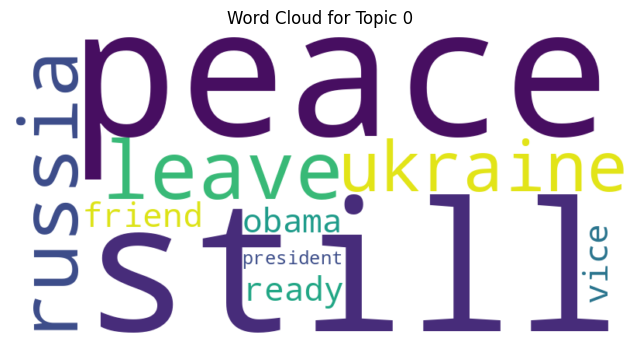

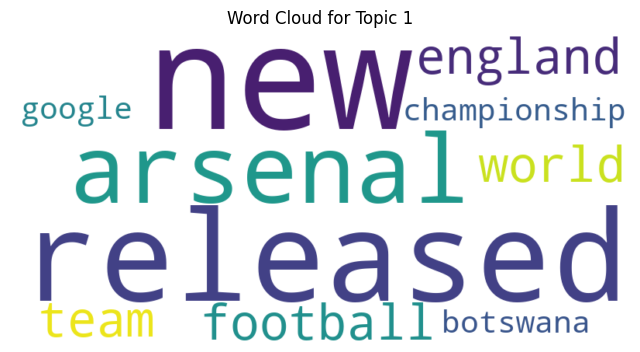

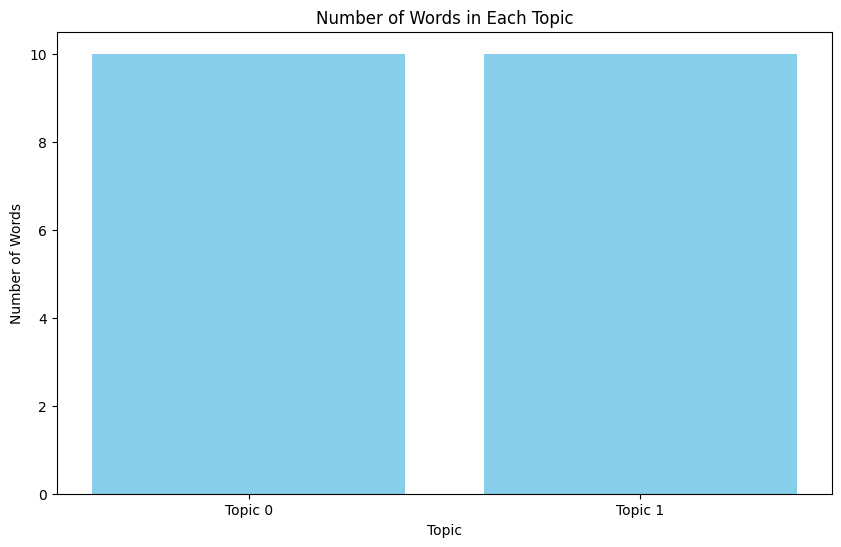

In [7]:
# Installing Necessary Libraries
!pip install nltk
!pip install gensim
!pip install pyLDAvis
!pip install matplotlib
!pip install wordcloud

import nltk
import gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# My data
data = [
    "The Botswana prime minister announced new regulations.",
    "Russia still not ready to leave Ukraine in peace.",
    "England's Arsenal football team won the world championship.",
    "The vice president calls Obama a friend.",
    "A new AI software was released by Google.",
    "Taylor Swift released a new song."
]

# Preprocessing the Data
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

preprocessed_corpus = [preprocess_text(doc) for doc in data]

# Creating dictionary and corpus for LDA
dictionary = gensim.corpora.Dictionary(preprocessed_corpus)
corpus = [dictionary.doc2bow(text) for text in preprocessed_corpus]

#  Fitting LDA Model
num_topics = 2  # You can adjust the number of topics if you want
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

#  Visualization 1 - Topic Word Cloud
for i in range(num_topics):
    topic_words = lda_model.show_topic(i, topn=10)
    word_freq = {word: weight for word, weight in topic_words}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Displaying the word cloud for the current topic
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {i}")
    plt.show()

#  Visualization 2 - Topic Frequency Bar Chart
topic_info = lda_model.show_topics(formatted=False)

# Count of words in each topic
topic_word_count = [len(topic[1]) for topic in topic_info]

plt.figure(figsize=(10, 6))
plt.bar(range(num_topics), topic_word_count, color='skyblue')
plt.xlabel("Topic")
plt.ylabel("Number of Words")
plt.title("Number of Words in Each Topic")
plt.xticks(range(num_topics), [f"Topic {i}" for i in range(num_topics)])
plt.show()

#  Visualization 3 - LDA Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
''' In comparing BERTopic, LDA, lda2vec, and LSA on a small text corpus, I found that each method has unique strengths and limitations. Mark you I
 had issues with lda2vec hence I did not use it much.
BERTopic, while powerful for large datasets, struggled with my small corpus since I had only provided 6 documents in exercise 3.
It generated computational errors and failed to produce meaningful topics and ended up giving me a headache.
This method is more suitable for complicated, large-scale datasets where it can force its clustering capabilities for refined topic differentiation,
but for limited data like mine, it’s not the best choice.

LDA, however, performed well with the smaller corpus. LDA model provided coherent, interpretable topics that
effectively captured overlapping themes. It allows for visualizing topic distributions across documents.
This makes it suitable for datasets where documents cover multiple themes. The use of NMF also performed well, generating distinct topics based
 on key terms and ensuring minimal overlap.
LSA offered a wider overview of themes but gave more generic topics due to its dependence on singular value decomposition.
 This is sensitive to small datasets. While useful for identifying general themes, LSA is not as precise as LDA
 for specific topic separation. Overall, for small datasets, I would recommend LDA due to its interpretability and flexibility.
 '''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' In comparing BERTopic, LDA, lda2vec, and LSA on a small text corpus, I found that each method has unique strengths and limitations. Mark you I\n had issues with lda2vec hence I did not use it much.\nBERTopic, while powerful for large datasets, struggled with my small corpus since I had only provided 6 documents in exercise 3. \nIt generated computational errors and failed to produce meaningful topics and ended up giving me a headache. \nThis method is more suitable for complicated, large-scale datasets where it can force its clustering capabilities for refined topic differentiation, \nbut for limited data like mine, it’s not the best choice.\n\nLDA, however, performed well with the smaller corpus. LDA model provided coherent, interpretable topics that \neffectively captured overlapping themes. It allows for visualizing topic distributions across documents. \nThis makes it suitable for datasets where documents cover multiple themes. The use of NMF also performed well, generating disti

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
I must admit that this exercise has given me the confidence to work with text data and to extract features using various models.
I wasn't easy though as I kept getting numerous errors either due to missing packages, wrong coding and at other times things just didn't work for me.
It is through dealing with such issues that I have gathered more skills as I feel that I can now work better on text data extraction using models.
This exercise sits squarely with with the field of NLP as all the questions above required knowledge of NLP.





'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nI must admit that this exercise has given me the confidence to work with text data and to extract features using various models.\nI wasn't easy though as I kept getting numerous errors either due to missing packages, wrong coding and at other times things just didn't work for me.\nIt is through dealing with such issues that I have gathered more skills as I feel that I can now work better on text data extraction using models.\nThis exercise sits squarely with with the field of NLP as all the questions above required knowledge of NLP.\n\n\n\n\n\n"